In [22]:
import pandas as pd
import numpy as np
import seaborn as sns



In [23]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [25]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
df = df[ df['species'] !=  'setosa']

In [27]:
df.species =df.species.map({ 'virginica':0,'versicolor':1 })

In [29]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=43)

In [31]:
from sklearn.linear_model import LogisticRegression
lclf = LogisticRegression()


In [38]:
from sklearn.model_selection import GridSearchCV
parameter = { 'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50,60,100],'max_iter':[100,200,300]}


In [39]:
clf_regressor= GridSearchCV(lclf,param_grid=parameter,scoring='accuracy',cv=6)

In [40]:
clf_regressor.fit(X_train,y_train)

/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
468 fits failed out of a total of 702.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/linear_model/_logis

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [41]:
print(clf_regressor.best_params_)

{'C': 4, 'max_iter': 100, 'penalty': 'l2'}


In [42]:
print(clf_regressor.best_score_)

0.9722222222222222


In [43]:
y_pred = clf_regressor.predict(X_test)

In [51]:
from sklearn.metrics import  r2_score,accuracy_score,top_k_accuracy_score,classification_report
r2score = r2_score(y_pred,y_test)
accuracy = accuracy_score(y_pred,y_test)

In [52]:
print(r2score)

0.7333333333333334


In [53]:
print(accuracy)

0.9333333333333333


In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



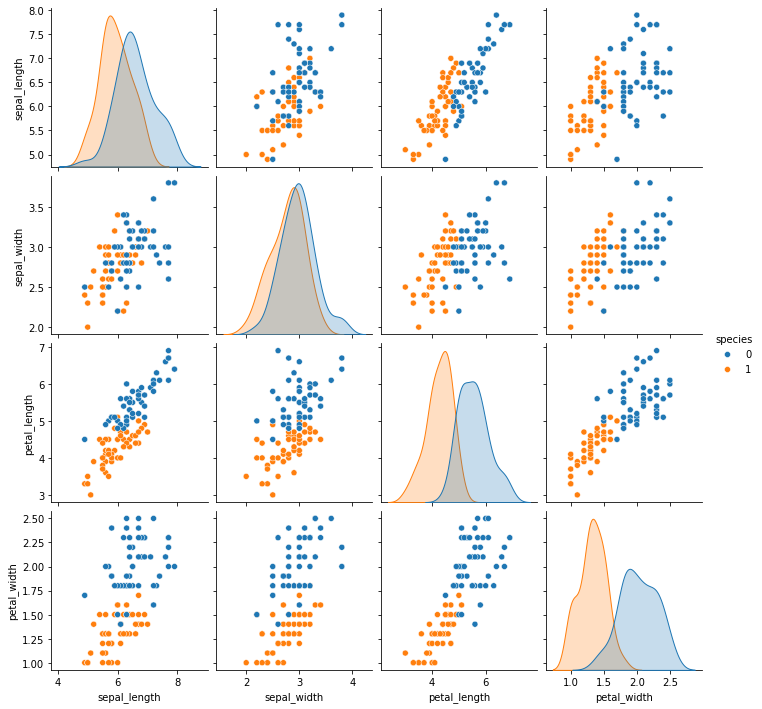

In [55]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [57]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64